Load the RDF data dump

In [2]:
%%time
from rdflib import ConjunctiveGraph

ns = {"nb": "http://bise-eu.info/core-ontology#",
      "dc": "http://dcterms/",
      "p-plan": "http://purl.org/net/p-plan#",
      "edam": "http://purl.obolibrary.org/obo/edam#"}

g = ConjunctiveGraph()
#g.parse("bise-linked-data-webapp/static/data/neubias-dump-20180129.ttl", format="turtle")
g.parse("data-dumps/latest/neubias-latest.ttl", format="turtle")
g.parse("bise-linked-data-webapp/static/data/EDAM-bioimaging_alpha03.owl")
http://data.bioontology.org/ontologies/EDAM-BIOIMAGING/submissions/4/download?apikey=8b5b7825-538d-40e0-9e9e-5ab9274a9aeb
print(str(len(g)) + ' triples in Biii data graph')

14239 triples in Biii data graph
CPU times: user 2.08 s, sys: 37 ms, total: 2.11 s
Wall time: 2.14 s


# Critical Entries +++

In [3]:
%%time
# Entries without authors and without download link
q = """
SELECT (count(?s) as ?nb_soft) WHERE {
    ?s rdf:type <http://biii.eu/node/software> .
    FILTER ( NOT EXISTS {?s nb:hasAuthor ?author} 
          && NOT EXISTS {?s nb:hasLocation ?location} ).
}
"""
no_authors_no_link = ""
results = g.query(q, initNs=ns)
for r in results:
    print('No author and no download link: ' + str(r["nb_soft"]))
    no_authors_no_link = r["nb_soft"]

    
# Entries with missing authors or download link
q = """
SELECT (count(?s) as ?nb_soft) WHERE {
    ?s rdf:type <http://biii.eu/node/software> .
    FILTER ( NOT EXISTS {?s nb:hasAuthor ?author} 
          || NOT EXISTS {?s nb:hasLocation ?location} ).
}
"""
no_authors_no_link = ""
results = g.query(q, initNs=ns)
for r in results:
    print('Missing authors or download link: ' + str(r["nb_soft"]))
    no_authors_no_link = r["nb_soft"]
    

# Entries without any EDAM operation
q = """
SELECT (count(?s) as ?nb_soft) WHERE {
    ?s rdf:type <http://biii.eu/node/software> .
    FILTER ( NOT EXISTS {?s nb:hasFunction ?function} 
          && NOT EXISTS {?s nb:hasTopic ?topic} ).
}
"""
no_EDAM = ""
results = g.query(q, initNs=ns)
for r in results:
    print('No EDAM annotations: ' + str(r["nb_soft"]))
    no_EDAM = r["nb_soft"]

    
# Entries without license
q = """
SELECT (count(?s) as ?nb_soft) WHERE {
    ?s rdf:type <http://biii.eu/node/software> .
    FILTER ( NOT EXISTS {?s nb:hasLicense ?license} ).
}
"""
no_License = ""
results = g.query(q, initNs=ns)
for r in results:
    print('No License (free text): ' + str(r["nb_soft"]))
    no_License = r["nb_soft"]

No author and no download link: 80
Missing authors or download link: 838
No EDAM annotations: 879
No License (free text): 1320
CPU times: user 4.87 s, sys: 76.9 ms, total: 4.95 s
Wall time: 5.22 s


In [4]:
%%time
q = """
SELECT ?label (count(distinct ?s1) as ?soft_count) WHERE { 
    ?s1 a <http://biii.eu/node/software> .
    ?s1 <http://bise-eu.info/core-ontology#hasTopic> ?edam_class .
    ?edam_class rdfs:label ?label
}
GROUP BY ?edam_class ?label
ORDER BY DESC(?soft_count)
"""

results = g.query(q, initNs=ns)

for r in results:
    print (r["label"] + " : " + r["soft_count"])

Bioimage informatics : 75
Fluorescence microscopy : 51
Machine learning : 34
Digital histology : 27
Microscopy : 21
Imaging : 15
Statistics : 14
Confocal microscopy : 14
Light-sheet microscopy : 14
Electron microscopy : 14
High content screening : 13
Super-resolution microscopy : 13
Light microscopy : 12
Single molecule localization microscopy : 12
Bright field microscopy : 10
Confocal fluorescence microscopy : 9
Data sharing : 8
Phase contrast microscopy : 7
Magnetic resonance imaging : 6
Structured illumination microscopy : 5
Widefield microscopy : 4
Correlative Light and Electron Microscopy : 4
Tomography : 4
Computerized tomography : 3
In-silico reconstruction : 3
Live sample imaging : 3
Topic : 3
Spectroscopy : 2
Multi-photon microscopy : 2
Scanning electron microscopy : 2
Electron tomography : 2
In-vitro imaging : 1
In-vivo imaging : 1
Fluorescence correlative spectroscopy : 1
Point-scanning microscopy : 1
Fluctuation based microscopy : 1
Focused ion beam scanning electron micros

## Count the number of tools without any reference publication

In [5]:
%time
no_doi_query = """
SELECT ?s (count(?title) as ?nb_soft) WHERE {
    ?s rdf:type <http://biii.eu/node/software> .
    ?s dc:title ?title .
    FILTER NOT EXISTS {?s nb:hasReferencePublication ?publication} .
}
"""
results = g.query(no_doi_query, initNs=ns)
for r in results:
    print(r["nb_soft"])

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs
1080


## Count the number of tools with a reference publication

In [7]:
%%time
doi_query = """
SELECT ?s (count(?title) as ?nb_soft) WHERE {
    ?s rdf:type <http://biii.eu/node/software> .
    ?s dc:title ?title .
    ?s nb:hasReferencePublication ?publication .
}
"""
results = g.query(doi_query, initNs=ns)
for r in results:
    print(r["nb_soft"])

382
CPU times: user 130 ms, sys: 3.1 ms, total: 134 ms
Wall time: 132 ms


In [8]:
%%time
how_many_tools_per_topic = """
SELECT ?label (count(distinct ?s1) as ?soft_count) WHERE { 
    ?s1 a <http://biii.eu/node/software> .
    ?s1 <http://bise-eu.info/core-ontology#hasTopic> ?edam_class .
        
    ?edam_class rdfs:label ?label .
}
GROUP BY ?edam_class ?label
ORDER BY DESC(?soft_count)
"""

results = g.query(how_many_tools_per_topic, initNs=ns)
for r in results:
    print(r["label"] + " : " + r["soft_count"])

Bioimage informatics : 61
Fluorescence microscopy : 48
Digital histology : 27
Machine learning : 24
Microscopy : 16
Statistics : 14
Electron microscopy : 14
Confocal microscopy : 14
Imaging : 14
High content screening : 13
Light-sheet microscopy : 13
Light microscopy : 11
Super-resolution microscopy : 11
Single molecule localization microscopy : 11
Bright field microscopy : 10
Data sharing : 8
Confocal fluorescence microscopy : 8
Magnetic resonance imaging : 6
Structured illumination microscopy : 5
Phase contrast microscopy : 5
Tomography : 4
Correlative Light and Electron Microscopy : 4
In-silico reconstruction : 3
Topic : 3
Widefield microscopy : 3
Live sample imaging : 3
Electron tomography : 2
Scanning electron microscopy : 2
Computerized tomography : 2
Spectroscopy : 2
Multi-photon microscopy : 2
Image correlation spectroscopy : 1
In-vitro imaging : 1
Serial block-face scanning electron microscopy : 1
Focused ion beam scanning electron microscopy : 1
Cryo electron tomography : 1
F

In [10]:
%%time
how_many_tools_per_operation = """
SELECT ?label (count(distinct ?s1) as ?soft_count) WHERE { 
    ?s1 a <http://biii.eu/node/software> .
    ?s1 <http://bise-eu.info/core-ontology#hasFunction> ?edam_class .
        
    ?edam_class rdfs:label ?label .
}
GROUP BY ?edam_class ?label
ORDER BY DESC(?soft_count)
"""

results = g.query(how_many_tools_per_operation, initNs=ns)
for r in results:
    print(r["label"] + " : " + r["soft_count"])

Image segmentation : 61
Cell segmentation : 33
Object tracking : 29
Image registration : 28
Spot detection : 27
Filament tracing : 26
Image processing : 23
Analysis : 22
Visualisation : 22
Neuron image analysis : 22
Image analysis : 22
Image visualisation : 19
Colocalisation analysis : 17
Object counting : 16
Object detection : 16
Cell tracking : 15
Morphological operation : 15
Image thresholding : 15
Image deconvolution : 15
Shape features : 14
Affine registration : 14
Isolated object classification : 12
Object feature extraction : 12
Volume rendering : 12
Rigid registration : 12
Image enhancement : 11
Data handling : 10
Interactive segmentation : 10
Object-based colocalisation : 10
Watershed : 9
Image denoising : 9
Active contours : 9
Pixel classification : 9
Deformable registration : 9
Image annotation : 8
Smoothing : 8
Isolated object detection : 7
Affine : 7
Particle tracking : 7
Alignment construction : 6
Image correction : 6
Image projection : 5
Drift correction : 5
Pattern reco

# Count the number of tool for 2015

In [14]:
%%time
date_query = """
SELECT (count(?soft) as ?nb_soft) WHERE {
    ?soft a <http://biii.eu/node/software> .
    ?soft dc:created ?date .
    FILTER ((?date > "2018-01-01T00:00:00"^^xsd:dateTime) 
            && (?date < "2019-01-01T00:00:00"^^xsd:dateTime))
}
"""
results = g.query(date_query, initNs=ns)
for r in results:
    print('{} registered softwares in 2015'.format(r['nb_soft']))
#    print(r["label"] + " : " + r["soft_count"])
print()


169 registered softwares in 2015

CPU times: user 392 ms, sys: 3.23 ms, total: 395 ms
Wall time: 397 ms


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

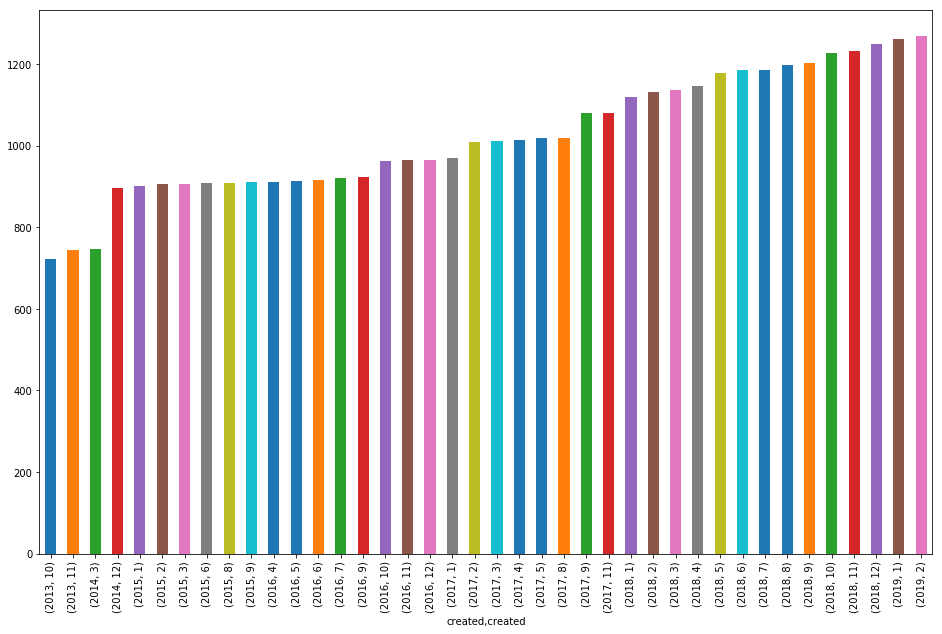

In [3]:
plt.figure(figsize=(16, 10))

soft_dates = []
date_query = """
SELECT ?soft ?date WHERE {
    ?soft a <http://biii.eu/node/software> .
    ?soft dc:created ?date .
}
"""
results = g.query(date_query, initNs=ns)
for r in results:
    soft_dates.append({'soft':r['soft'], 'created':r['date']})

df = pd.DataFrame(soft_dates)
df["created"] = df["created"].astype("datetime64")

df2 = df.groupby([df["created"].dt.year, df["created"].dt.month]).count()
#df2 = df.groupby([df["created"].dt.year]).count()

#df.groupby(df["created"].dt.year)["soft"].count().plot(kind='bar')

df2['soft'].cumsum().plot(kind='bar')

,count,period
0,744,2013
1,152,2014
2,14,2015
3,56,2016
4,115,2017
5,169,2018
6,19,2019


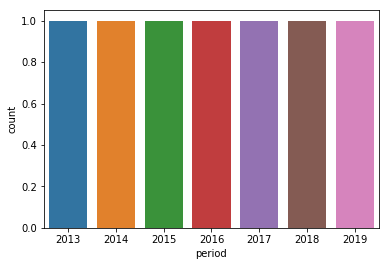

In [5]:
import seaborn as sns

df3 = df['soft'].groupby(df.created.dt.to_period("Y")).agg('count')

rows = []
for i, v in df3.items():
    rows.append({'period':str(i), 'count':v})

#df_plot["count"] = df_plot["count"].astype("int64")
df_plot = pd.DataFrame(rows) 
sns.countplot(df_plot["period"]);
    
#plt.title('Histogram of Arrival Delays')
#plt.xlabel('Delay (min)')
#plt.ylabel('Flights')

df_plot


Ideas of plots : 
 - cumulative stacked hostogram with : "no EDAM annotation" / "some EDAM annotatino" to show that we improvve the quality of tool descriptions
 - same thing with 4-5 categories for the main Topics
 - same thing Tools VS Traing material
 - Open Source VS Comercial softwares 
 

In [75]:
import plotly.offline as pl
import plotly.graph_objs as go
import plotly.tools as pltools
pl.init_notebook_mode(connected = True)

In [100]:
%%time
#get the main Topics
how_many_tools_per_topic = """
SELECT ?l (count(distinct ?s1) as ?soft_count) WHERE { 
#SELECT ?subclass WHERE { 
    ?s1 a <http://biii.eu/node/software> .
    ?c rdfs:subClassOf <http://edamontology.org/topic_0003> .
    ?c rdfs:label ?l .
    ?subclass rdfs:subClassOf* ?c .
    ?s1 <http://bise-eu.info/core-ontology#hasTopic> ?subclass .
}
GROUP BY ?c ?l
ORDER BY DESC(?soft_count)
"""

list_of_topics = []
results = g.query(how_many_tools_per_topic, initNs=ns)
for r in results:
    list_of_topics.append({'Topic':str(r['l']), 'Count':str(r['soft_count'])})
print(list_of_topics)

[{'Topic': 'Imaging', 'Count': '152'}, {'Topic': 'Bioimage informatics', 'Count': '57'}, {'Topic': 'Digital histology', 'Count': '27'}, {'Topic': 'Machine learning', 'Count': '23'}, {'Topic': 'Statistics', 'Count': '14'}, {'Topic': 'High content screening', 'Count': '13'}, {'Topic': 'Data sharing', 'Count': '8'}, {'Topic': 'In-silico reconstruction', 'Count': '3'}]


In [6]:
%%time
#get the main Operations
how_many_tools_per_op = """
SELECT ?l (count(distinct ?s1) as ?soft_count) WHERE { 
#SELECT ?subclass ?l WHERE { 
    ?s1 a <http://biii.eu/node/software> .
    ?c rdfs:subClassOf <http://edamontology.org/operation_0004> .
    ?c rdfs:label ?l .
    ?subclass rdfs:subClassOf* ?c .
    ?s1 <http://bise-eu.info/core-ontology#hasFunction> ?subclass .
}
GROUP BY ?c ?l
ORDER BY DESC(?soft_count)
"""

list_of_op = []
results = g.query(how_many_tools_per_op, initNs=ns)
for r in results:
    list_of_op.append({'Operation':str(r['l']), 'Count':str(r['soft_count'])})
print(list_of_op)

[{'Operation': 'Analysis', 'Count': '237'}, {'Operation': 'Image processing', 'Count': '137'}, {'Operation': 'Visualisation', 'Count': '42'}, {'Operation': 'Alignment construction', 'Count': '38'}, {'Operation': 'Generation', 'Count': '37'}, {'Operation': 'Classification', 'Count': '27'}, {'Operation': 'Data handling', 'Count': '13'}, {'Operation': 'Annotation', 'Count': '11'}, {'Operation': 'Prediction and recognition', 'Count': '7'}, {'Operation': 'Clustering', 'Count': '4'}, {'Operation': 'Conversion', 'Count': '3'}, {'Operation': 'Validation', 'Count': '1'}]
CPU times: user 26.3 s, sys: 167 ms, total: 26.5 s
Wall time: 26.7 s


In [7]:
%%time
list_tools_op_topic = """
SELECT ?s1 ?ol ?tl WHERE { 
    ?s1 a <http://biii.eu/node/software> .
    ?oc rdfs:subClassOf <http://edamontology.org/operation_0004> .
    ?oc rdfs:label ?ol .
    ?osc rdfs:subClassOf* ?oc .
    ?s1 <http://bise-eu.info/core-ontology#hasFunction> ?osc .
    
    ?tc rdfs:subClassOf <http://edamontology.org/topic_0003> .
    ?tc rdfs:label ?tl .
    ?tsc rdfs:subClassOf* ?tc .
    ?s1 <http://bise-eu.info/core-ontology#hasTopic> ?tsc .
}
"""
tools = []
results = g.query(list_tools_op_topic, initNs=ns)
for r in results:
    t = {'tool':str(r['s1']), 'operation': str(r['ol']),'topic': str(r['tl'])}
    print(t)
    tools.append(t)

{'tool': 'http://biii.eu/node/1375', 'operation': 'Classification', 'topic': 'Imaging'}
{'tool': 'http://biii.eu/node/1375', 'operation': 'Classification', 'topic': 'Machine learning'}
{'tool': 'http://biii.eu/node/259', 'operation': 'Classification', 'topic': 'Digital histology'}
{'tool': 'http://biii.eu/node/1337', 'operation': 'Classification', 'topic': 'Bioimage informatics'}
{'tool': 'http://biii.eu/node/1337', 'operation': 'Classification', 'topic': 'Imaging'}
{'tool': 'http://biii.eu/node/88', 'operation': 'Classification', 'topic': 'Digital histology'}
{'tool': 'http://biii.eu/node/88', 'operation': 'Classification', 'topic': 'In-silico reconstruction'}
{'tool': 'http://biii.eu/node/88', 'operation': 'Classification', 'topic': 'Machine learning'}
{'tool': 'http://biii.eu/node/1338', 'operation': 'Classification', 'topic': 'Imaging'}
{'tool': 'http://biii.eu/node/324', 'operation': 'Classification', 'topic': 'Machine learning'}
{'tool': 'http://biii.eu/node/1172', 'operation': '

{'tool': 'http://biii.eu/node/1382', 'operation': 'Annotation', 'topic': 'Bioimage informatics'}
{'tool': 'http://biii.eu/node/1382', 'operation': 'Annotation', 'topic': 'Imaging'}
{'tool': 'http://biii.eu/node/1382', 'operation': 'Annotation', 'topic': 'Imaging'}
{'tool': 'http://biii.eu/node/1382', 'operation': 'Annotation', 'topic': 'Imaging'}
{'tool': 'http://biii.eu/node/1382', 'operation': 'Annotation', 'topic': 'Imaging'}
{'tool': 'http://biii.eu/node/1382', 'operation': 'Annotation', 'topic': 'Imaging'}
{'tool': 'http://biii.eu/node/1382', 'operation': 'Annotation', 'topic': 'High content screening'}
{'tool': 'http://biii.eu/node/1430', 'operation': 'Image processing', 'topic': 'Bioimage informatics'}
{'tool': 'http://biii.eu/node/1430', 'operation': 'Image processing', 'topic': 'Bioimage informatics'}
{'tool': 'http://biii.eu/node/1430', 'operation': 'Image processing', 'topic': 'Bioimage informatics'}
{'tool': 'http://biii.eu/node/1430', 'operation': 'Image processing', 'topi

{'tool': 'http://biii.eu/node/1405', 'operation': 'Image processing', 'topic': 'Bioimage informatics'}
{'tool': 'http://biii.eu/node/485', 'operation': 'Image processing', 'topic': 'Bioimage informatics'}
{'tool': 'http://biii.eu/node/485', 'operation': 'Image processing', 'topic': 'Bioimage informatics'}
{'tool': 'http://biii.eu/node/1359', 'operation': 'Image processing', 'topic': 'Statistics'}
{'tool': 'http://biii.eu/node/1359', 'operation': 'Image processing', 'topic': 'Imaging'}
{'tool': 'http://biii.eu/node/1359', 'operation': 'Image processing', 'topic': 'Imaging'}
{'tool': 'http://biii.eu/node/1359', 'operation': 'Image processing', 'topic': 'Imaging'}
{'tool': 'http://biii.eu/node/1359', 'operation': 'Image processing', 'topic': 'Imaging'}
{'tool': 'http://biii.eu/node/1127', 'operation': 'Image processing', 'topic': 'Imaging'}
{'tool': 'http://biii.eu/node/1127', 'operation': 'Image processing', 'topic': 'Imaging'}
{'tool': 'http://biii.eu/node/1127', 'operation': 'Image pro

{'tool': 'http://biii.eu/node/1221', 'operation': 'Image processing', 'topic': 'High content screening'}
{'tool': 'http://biii.eu/node/1421', 'operation': 'Image processing', 'topic': 'Imaging'}
{'tool': 'http://biii.eu/node/1421', 'operation': 'Image processing', 'topic': 'Imaging'}
{'tool': 'http://biii.eu/node/1421', 'operation': 'Image processing', 'topic': 'Imaging'}
{'tool': 'http://biii.eu/node/1421', 'operation': 'Image processing', 'topic': 'Imaging'}
{'tool': 'http://biii.eu/node/1421', 'operation': 'Image processing', 'topic': 'Imaging'}
{'tool': 'http://biii.eu/node/1421', 'operation': 'Image processing', 'topic': 'Imaging'}
{'tool': 'http://biii.eu/node/308', 'operation': 'Image processing', 'topic': 'Statistics'}
{'tool': 'http://biii.eu/node/308', 'operation': 'Image processing', 'topic': 'Imaging'}
{'tool': 'http://biii.eu/node/1201', 'operation': 'Image processing', 'topic': 'Machine learning'}
{'tool': 'http://biii.eu/node/1119', 'operation': 'Image processing', 'topi

{'tool': 'http://biii.eu/node/764', 'operation': 'Analysis', 'topic': 'Imaging'}
{'tool': 'http://biii.eu/node/764', 'operation': 'Analysis', 'topic': 'Imaging'}
{'tool': 'http://biii.eu/node/764', 'operation': 'Analysis', 'topic': 'Imaging'}
{'tool': 'http://biii.eu/node/1058', 'operation': 'Analysis', 'topic': 'Imaging'}
{'tool': 'http://biii.eu/node/259', 'operation': 'Analysis', 'topic': 'Digital histology'}
{'tool': 'http://biii.eu/node/259', 'operation': 'Analysis', 'topic': 'Digital histology'}
{'tool': 'http://biii.eu/node/1336', 'operation': 'Analysis', 'topic': 'Imaging'}
{'tool': 'http://biii.eu/node/1336', 'operation': 'Analysis', 'topic': 'Imaging'}
{'tool': 'http://biii.eu/node/1336', 'operation': 'Analysis', 'topic': 'Imaging'}
{'tool': 'http://biii.eu/node/1336', 'operation': 'Analysis', 'topic': 'Imaging'}
{'tool': 'http://biii.eu/node/1336', 'operation': 'Analysis', 'topic': 'Imaging'}
{'tool': 'http://biii.eu/node/1336', 'operation': 'Analysis', 'topic': 'Imaging'}
{

{'tool': 'http://biii.eu/node/1408', 'operation': 'Analysis', 'topic': 'Bioimage informatics'}
{'tool': 'http://biii.eu/node/1408', 'operation': 'Analysis', 'topic': 'Bioimage informatics'}
{'tool': 'http://biii.eu/node/509', 'operation': 'Analysis', 'topic': 'Imaging'}
{'tool': 'http://biii.eu/node/227', 'operation': 'Analysis', 'topic': 'Bioimage informatics'}
{'tool': 'http://biii.eu/node/227', 'operation': 'Analysis', 'topic': 'Bioimage informatics'}
{'tool': 'http://biii.eu/node/1405', 'operation': 'Analysis', 'topic': 'Bioimage informatics'}
{'tool': 'http://biii.eu/node/1359', 'operation': 'Analysis', 'topic': 'Statistics'}
{'tool': 'http://biii.eu/node/1359', 'operation': 'Analysis', 'topic': 'Statistics'}
{'tool': 'http://biii.eu/node/1359', 'operation': 'Analysis', 'topic': 'Imaging'}
{'tool': 'http://biii.eu/node/1359', 'operation': 'Analysis', 'topic': 'Imaging'}
{'tool': 'http://biii.eu/node/1359', 'operation': 'Analysis', 'topic': 'Imaging'}
{'tool': 'http://biii.eu/node/

{'tool': 'http://biii.eu/node/309', 'operation': 'Analysis', 'topic': 'Imaging'}
{'tool': 'http://biii.eu/node/1225', 'operation': 'Analysis', 'topic': 'Digital histology'}
{'tool': 'http://biii.eu/node/1225', 'operation': 'Analysis', 'topic': 'Digital histology'}
{'tool': 'http://biii.eu/node/1225', 'operation': 'Analysis', 'topic': 'Digital histology'}
{'tool': 'http://biii.eu/node/1225', 'operation': 'Analysis', 'topic': 'Machine learning'}
{'tool': 'http://biii.eu/node/1225', 'operation': 'Analysis', 'topic': 'Machine learning'}
{'tool': 'http://biii.eu/node/1225', 'operation': 'Analysis', 'topic': 'Machine learning'}
{'tool': 'http://biii.eu/node/1332', 'operation': 'Analysis', 'topic': 'Imaging'}
{'tool': 'http://biii.eu/node/66', 'operation': 'Analysis', 'topic': 'Imaging'}
{'tool': 'http://biii.eu/node/66', 'operation': 'Analysis', 'topic': 'Imaging'}
{'tool': 'http://biii.eu/node/66', 'operation': 'Analysis', 'topic': 'Machine learning'}
{'tool': 'http://biii.eu/node/66', 'ope

{'tool': 'http://biii.eu/node/1350', 'operation': 'Analysis', 'topic': 'Imaging'}
{'tool': 'http://biii.eu/node/1125', 'operation': 'Analysis', 'topic': 'Imaging'}
{'tool': 'http://biii.eu/node/1125', 'operation': 'Analysis', 'topic': 'Imaging'}
{'tool': 'http://biii.eu/node/1125', 'operation': 'Analysis', 'topic': 'Imaging'}
{'tool': 'http://biii.eu/node/1134', 'operation': 'Analysis', 'topic': 'Digital histology'}
{'tool': 'http://biii.eu/node/1325', 'operation': 'Analysis', 'topic': 'Imaging'}
{'tool': 'http://biii.eu/node/1325', 'operation': 'Analysis', 'topic': 'Machine learning'}
{'tool': 'http://biii.eu/node/1128', 'operation': 'Analysis', 'topic': 'Bioimage informatics'}
{'tool': 'http://biii.eu/node/1128', 'operation': 'Analysis', 'topic': 'High content screening'}
{'tool': 'http://biii.eu/node/1276', 'operation': 'Analysis', 'topic': 'Imaging'}
{'tool': 'http://biii.eu/node/1276', 'operation': 'Analysis', 'topic': 'Imaging'}
{'tool': 'http://biii.eu/node/1276', 'operation': '

{'tool': 'http://biii.eu/node/313', 'operation': 'Analysis', 'topic': 'Imaging'}
{'tool': 'http://biii.eu/node/1070', 'operation': 'Analysis', 'topic': 'Imaging'}
{'tool': 'http://biii.eu/node/989', 'operation': 'Analysis', 'topic': 'Bioimage informatics'}
{'tool': 'http://biii.eu/node/989', 'operation': 'Analysis', 'topic': 'Bioimage informatics'}
{'tool': 'http://biii.eu/node/989', 'operation': 'Analysis', 'topic': 'Machine learning'}
{'tool': 'http://biii.eu/node/989', 'operation': 'Analysis', 'topic': 'Machine learning'}
{'tool': 'http://biii.eu/node/1363', 'operation': 'Analysis', 'topic': 'Bioimage informatics'}
{'tool': 'http://biii.eu/node/1363', 'operation': 'Analysis', 'topic': 'Bioimage informatics'}
{'tool': 'http://biii.eu/node/1363', 'operation': 'Analysis', 'topic': 'Imaging'}
{'tool': 'http://biii.eu/node/1363', 'operation': 'Analysis', 'topic': 'Imaging'}
{'tool': 'http://biii.eu/node/1382', 'operation': 'Analysis', 'topic': 'Bioimage informatics'}
{'tool': 'http://bii

{'tool': 'http://biii.eu/node/1272', 'operation': 'Analysis', 'topic': 'Bioimage informatics'}
{'tool': 'http://biii.eu/node/1057', 'operation': 'Analysis', 'topic': 'Bioimage informatics'}
{'tool': 'http://biii.eu/node/1057', 'operation': 'Analysis', 'topic': 'Bioimage informatics'}
{'tool': 'http://biii.eu/node/1057', 'operation': 'Analysis', 'topic': 'Bioimage informatics'}
{'tool': 'http://biii.eu/node/1057', 'operation': 'Analysis', 'topic': 'Bioimage informatics'}
{'tool': 'http://biii.eu/node/1057', 'operation': 'Analysis', 'topic': 'Bioimage informatics'}
{'tool': 'http://biii.eu/node/1057', 'operation': 'Analysis', 'topic': 'Bioimage informatics'}
{'tool': 'http://biii.eu/node/1057', 'operation': 'Analysis', 'topic': 'Imaging'}
{'tool': 'http://biii.eu/node/1057', 'operation': 'Analysis', 'topic': 'Imaging'}
{'tool': 'http://biii.eu/node/1057', 'operation': 'Analysis', 'topic': 'Imaging'}
{'tool': 'http://biii.eu/node/1057', 'operation': 'Analysis', 'topic': 'Imaging'}
{'tool'

{'tool': 'http://biii.eu/node/10', 'operation': 'Alignment construction', 'topic': 'Imaging'}
{'tool': 'http://biii.eu/node/10', 'operation': 'Alignment construction', 'topic': 'Imaging'}
{'tool': 'http://biii.eu/node/10', 'operation': 'Alignment construction', 'topic': 'Imaging'}
{'tool': 'http://biii.eu/node/153', 'operation': 'Clustering', 'topic': 'Bioimage informatics'}
{'tool': 'http://biii.eu/node/1194', 'operation': 'Clustering', 'topic': 'Statistics'}
{'tool': 'http://biii.eu/node/1390', 'operation': 'Clustering', 'topic': 'Statistics'}
{'tool': 'http://biii.eu/node/143', 'operation': 'Clustering', 'topic': 'Imaging'}
{'tool': 'http://biii.eu/node/143', 'operation': 'Clustering', 'topic': 'Imaging'}
{'tool': 'http://biii.eu/node/1313', 'operation': 'Data handling', 'topic': 'Bioimage informatics'}
{'tool': 'http://biii.eu/node/1343', 'operation': 'Data handling', 'topic': 'Bioimage informatics'}
{'tool': 'http://biii.eu/node/1341', 'operation': 'Data handling', 'topic': 'Bioim

{'tool': 'http://biii.eu/node/1192', 'operation': 'Visualisation', 'topic': 'Bioimage informatics'}
{'tool': 'http://biii.eu/node/1192', 'operation': 'Visualisation', 'topic': 'Statistics'}
{'tool': 'http://biii.eu/node/1192', 'operation': 'Visualisation', 'topic': 'Imaging'}
{'tool': 'http://biii.eu/node/253', 'operation': 'Visualisation', 'topic': 'Data sharing'}
{'tool': 'http://biii.eu/node/76', 'operation': 'Visualisation', 'topic': 'Imaging'}
{'tool': 'http://biii.eu/node/1419', 'operation': 'Visualisation', 'topic': 'Imaging'}
{'tool': 'http://biii.eu/node/1391', 'operation': 'Visualisation', 'topic': 'Statistics'}
{'tool': 'http://biii.eu/node/1391', 'operation': 'Visualisation', 'topic': 'Statistics'}
{'tool': 'http://biii.eu/node/1391', 'operation': 'Visualisation', 'topic': 'Statistics'}
{'tool': 'http://biii.eu/node/1391', 'operation': 'Visualisation', 'topic': 'High content screening'}
{'tool': 'http://biii.eu/node/1391', 'operation': 'Visualisation', 'topic': 'High conten

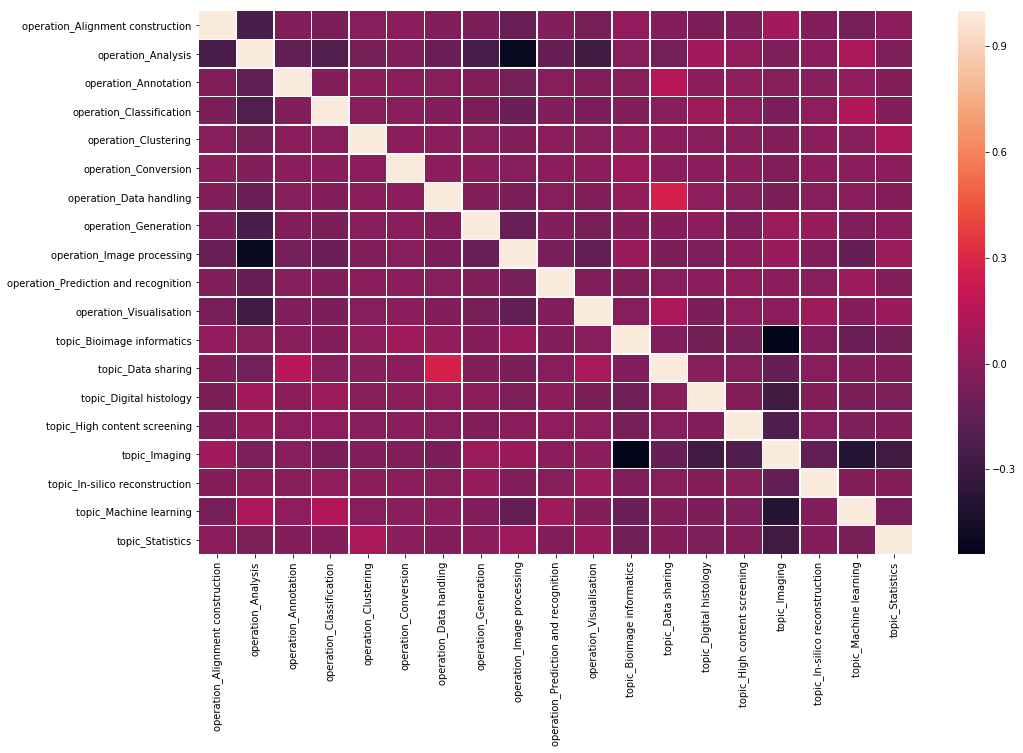

In [8]:
plt.figure(figsize=(16, 10))

df_heatmap = pd.DataFrame(tools) 
df_heatmap_dum = pd.get_dummies(df_heatmap, columns=['operation', 'topic'])
#df_heatmap_dum.corr()
sns.heatmap(df_heatmap_dum.corr(), linewidths=.5)
#corr = df_heatmap['operation'].corr(df_heatmap['topic'])
#corr
#sns.heatmap(df_heatmap.corr(), linewidths=.5)

In [88]:
data = dict(
    type='sankey',
    node = dict(
        pad = 15,
        thickness = 20,
        line = dict(
            color = "black",
            width = 0.5
        ),
        label = ["A1", "A2", "B1", "B2", "C1", "C2"],
        color = ["orange", "green", "blue", "magenta", "blue", "blue"]
    ),
    link = dict(
        source = [0,1,0,2,3,3],
        target = [2,3,3,4,4,5],
        value = [8,4,2,8,4,2]
))

layout =  dict(
    title = "Basic Sankey Diagram",
    font = dict(
      size = 10
    )
)

fig = dict(data=[data], layout=layout)
pl.iplot(fig, validate=False)

['In-silico reconstruction', 'High content screening', 'Statistics', 'Imaging', 'Bioimage informatics', 'Machine learning', 'Sample preparation', 'Data sharing', 'Digital histology']
